# Project 15: Text2SQL via Prompt Engineering

# Text-to-SQL: Bridging the Gap Between Human Language and Databases


Text-to-SQL, also known as Natural Language to SQL (NL2SQL), is a rapidly evolving technology that translates natural, everyday language into Structured Query Language (SQL) commands. This innovative approach empowers users to interact with and retrieve data from databases simply by asking questions in plain English, eliminating the need for specialized knowledge of complex SQL syntax.

At its core, Text-to-SQL acts as an intelligent translator. It leverages the power of artificial intelligence, particularly **Natural Language Processing (NLP)** and sophisticated **AI models**, to understand the user's intent and generate the corresponding SQL query. This process allows individuals without a technical background to explore and analyze data, thereby democratizing data access within an organization.



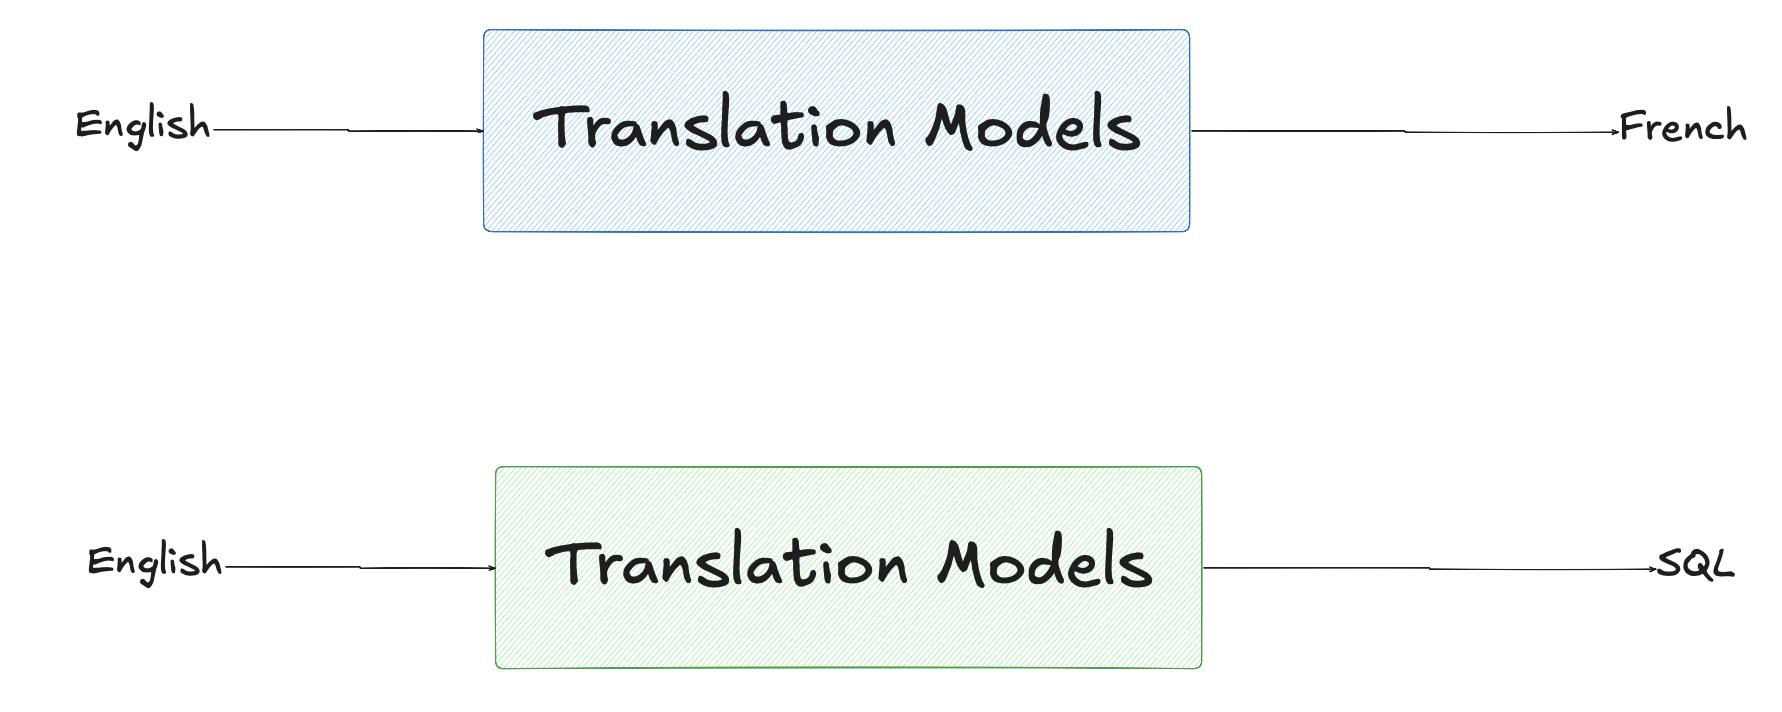

## How It Works: From a Simple Question to a Complex Query

The conversion of a user's question into an executable SQL query involves a multi-step process:

1.  **Natural Language Understanding (NLU):** The system first analyzes the user's input to decipher its meaning. This involves identifying key entities (like specific columns or tables), the relationships between them, and the user's ultimate goal (e.g., to filter, aggregate, or sort data).

2.  **Schema Linking:** Once the intent is understood, the system maps the identified entities from the natural language question to the specific tables and columns within the database's schema. This is a critical step to ensure the generated query is accurate and relevant to the available data structure.

3.  **SQL Generation:** With the user's intent and the relevant database schema components identified, the AI model constructs the appropriate SQL query. This can range from a simple `SELECT` statement to a complex query involving multiple `JOIN`s, `WHERE` clauses, and aggregate functions.

4.  **Query Execution and Response:** The generated SQL query is then executed against the database. The retrieved data is presented back to the user in a clear and understandable format, often as a table, chart, or a natural language summary.

## Key Applications and Use Cases

The ability to query databases using natural language has a wide array of applications across various industries:

* **Business Intelligence (BI) and Analytics:** Business analysts and decision-makers can quickly get answers to their data-driven questions without relying on data scientists or IT professionals. This accelerates the pace of analysis and reporting.
* **Data Exploration:** For both technical and non-technical users, Text-to-SQL provides an intuitive way to explore large and unfamiliar datasets, uncover insights, and formulate more specific data requests.
* **Customer Support:** Chatbots and virtual assistants integrated with Text-to-SQL can provide customers with real-time information by querying relevant databases based on their questions.
* **E-commerce:** Users can search for products using natural language filters and criteria, which are then translated into database queries to retrieve the most relevant results.

## The Advantages and Challenges

**Benefits:**

* **Increased Accessibility:** It breaks down the barrier to data, allowing a broader range of users to perform data analysis.
* **Improved Efficiency:** It significantly speeds up the process of data retrieval and report generation.
* **Reduced Reliance on Technical Experts:** It frees up data professionals from writing routine queries, allowing them to focus on more complex tasks.

**Challenges:**

* **Ambiguity of Natural Language:** Human language is often imprecise and context-dependent, which can lead to misinterpretation by the AI and the generation of incorrect queries.
* **Complex Database Schemas:** Large and intricately designed databases can pose a significant challenge for the AI to navigate and understand the relationships between numerous tables and columns.
* **Handling Complex Queries:** While proficient at generating simpler queries, Text-to-SQL systems can sometimes struggle with highly complex requests that require deep domain knowledge and intricate logic.

Despite these challenges, the field of Text-to-SQL is continuously advancing, with ongoing research focused on improving the accuracy, robustness, and capabilities of these powerful systems. As AI models become more sophisticated, Text-to-SQL is poised to become an indispensable tool for seamless and intuitive data interaction.

Let's take a minute to look at https://bird-bench.github.io/

# Our Approach

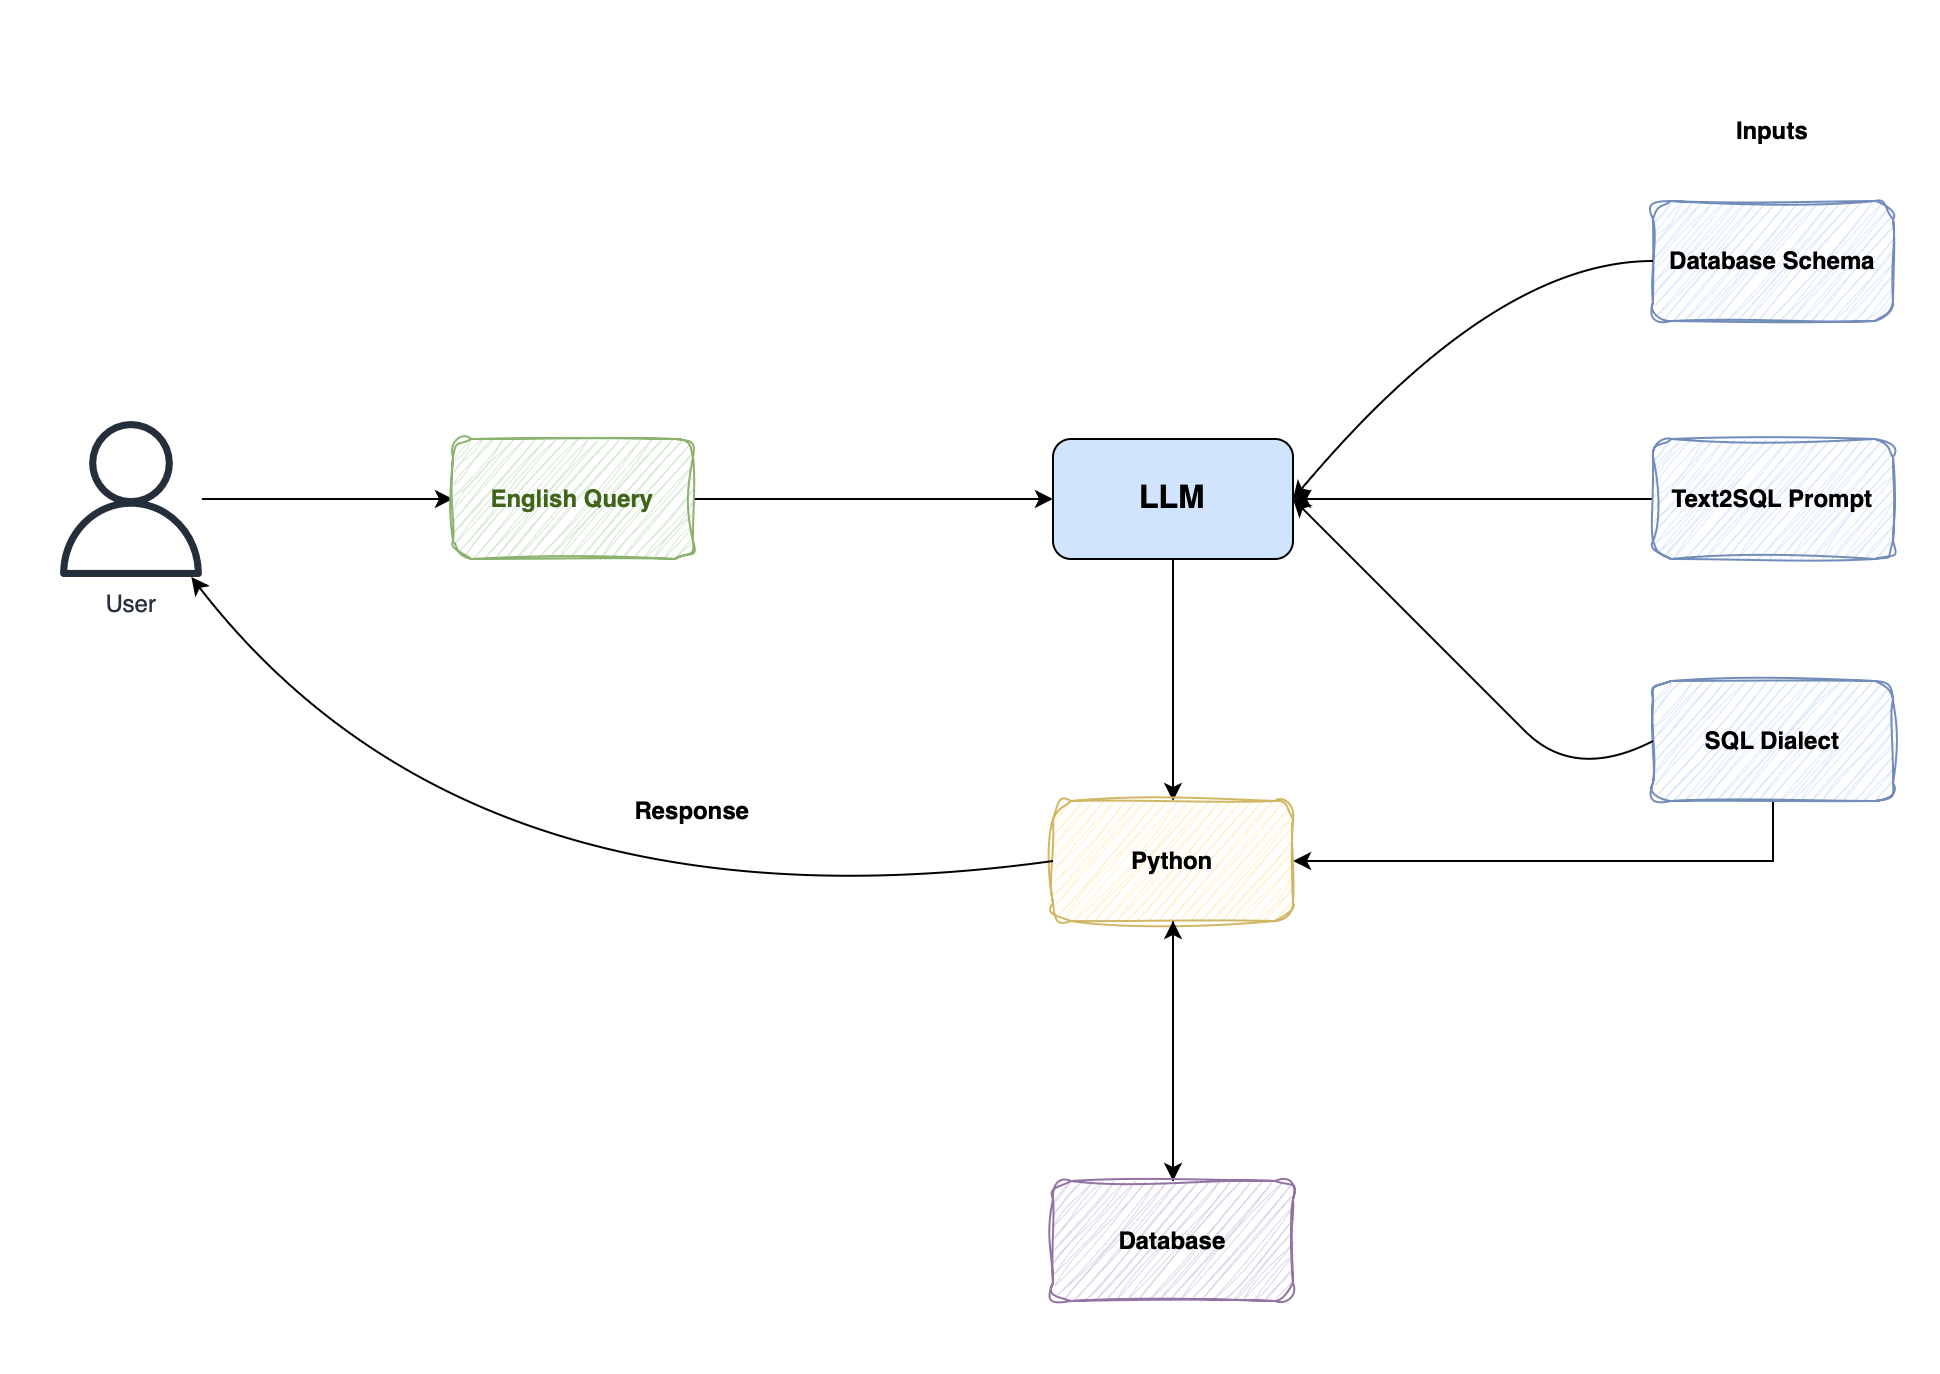

# Tangent 1: You should know about Mockaroo

http://mockaroo.com

## Retrieve data

# Notebook Updated with Employees.csv Data

In [1]:
! curl "https://api.mockaroo.com/api/dde01370?count=1000&key=11149690" > "customers.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 99527    0 99527    0     0  56479      0 --:--:--  0:00:01 --:--:-- 56453


In [2]:
! curl "https://api.mockaroo.com/api/8ba6f630?count=1000&key=11149690" > "products.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  686k    0  686k    0     0   226k      0 --:--:--  0:00:03 --:--:--  226k


In [3]:
! curl "https://api.mockaroo.com/api/6fa67fe0?count=3000&key=11149690" > "orders.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  230k    0  230k    0     0  35855      0 --:--:--  0:00:06 --:--:-- 43675


In [4]:
!curl "https://api.mockaroo.com/api/8757f040?count=1000&key=553511f0" > "Employees.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 62885    0 62885    0     0  42848      0 --:--:--  0:00:01 --:--:-- 42866


## Setup database

In [5]:
import sqlite3
import pandas as pd
import os

In [6]:
# Define SQL schemas for creating tables
customers_schema = """
CREATE TABLE IF NOT EXISTS customers (
    customer_id INT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    email VARCHAR(50),
    phone_number VARCHAR(50),
    address VARCHAR(50),
    city VARCHAR(50),
    country VARCHAR(50),
    postal_code VARCHAR(50),
    loyalty_points INT
);
"""

products_schema = """
CREATE TABLE IF NOT EXISTS products (
    product_id INT PRIMARY KEY,
    product_name TEXT,
    description TEXT,
    price DECIMAL(10,2),
    discount_percentage DECIMAL(5,2),
    category VARCHAR(50),
    brand TEXT,
    stock_quantity INT,
    color VARCHAR(50),
    size VARCHAR(20),
    weight DECIMAL(5,2),
    dimensions TEXT,
    release_date DATE,
    rating DECIMAL(3,1),
    reviews_count INT,
    seller_name TEXT,
    seller_rating DECIMAL(3,1),
    seller_reviews_count INT,
    shipping_method VARCHAR(20),
    shipping_cost DECIMAL(6,2)
);
"""

orders_schema = """
CREATE TABLE IF NOT EXISTS orders (
    order_id INT PRIMARY KEY,
    customer_id INT,
    product_id INT,
    quantity INT,
    unit_price DECIMAL(10,2),
    total_price DECIMAL(10,2),
    order_date DATE,
    shipping_address VARCHAR(255),
    payment_method VARCHAR(20),
    status VARCHAR(20),
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id),
    FOREIGN KEY (product_id) REFERENCES products(product_id)
);
"""

employees_schema = """
CREATE TABLE IF NOT EXISTS employees (
    employee_id INT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    email VARCHAR(50),
    phone_number VARCHAR(50),
    hire_date DATE,
    job_title VARCHAR(50),
    department VARCHAR(50),
    salary DECIMAL(10,2)
);
"""

In [8]:
db_name = 'ecommerce.db'
if os.path.exists(db_name):
    os.remove(db_name)
    print(f"Removed existing database '{db_name}'.")

Removed existing database 'ecommerce.db'.


In [9]:
import sqlite3
import pandas as pd
import os



COLUMN_DATA_TYPES = {
    'customers': {
        'customer_id': 'int64',
        'first_name': 'object',
        'last_name': 'object',
        'email': 'object',
        'phone_number': 'object',
        'address': 'object',
        'city': 'object',
        'country': 'object',
        'postal_code': 'object',
        'loyalty_points': 'int64'
    },
    'products': {
        'product_id': 'int64',
        'product_name': 'object',
        'description': 'object',
        'price': 'float64',
        'discount_percentage': 'float64',
        'category': 'object',
        'brand': 'object',
        'stock_quantity': 'int64',
        'color': 'object',
        'size': 'object',
        'weight': 'float64',
        'dimensions': 'object',
        'release_date': 'datetime64[ns]',
        'rating': 'float64',
        'reviews_count': 'int64',
        'seller_name': 'object',
        'seller_rating': 'float64',
        'seller_reviews_count': 'int64',
        'shipping_method': 'object',
        'shipping_cost': 'float64'
    },
    'orders': {
        'order_id': 'int64',
        'customer_id': 'int64',
        'product_id': 'int64',
        'quantity': 'int64',
        'unit_price': 'float64',
        'total_price': 'float64',
        'order_date': 'datetime64[ns]',
        'shipping_address': 'object',
        'payment_method': 'object',
        'status': 'object'
    },
    'employees': {
        'employee_id': 'int64',
        'first_name': 'object',
        'last_name': 'object',
        'email': 'object',
        'phone_number': 'object',
        'hire_date': 'datetime64[ns]',
        'job_title': 'object',
        'department': 'object',
        'salary': 'float64'
    }
}

# --- Database setup ---
db_name = 'ecommerce.db'
conn = None  # Initialize connection to None

try:
    # Establish a connection to the SQLite database
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    print(f"Database '{db_name}' created and connected successfully. ✅")

    # Create tables
    cursor.execute(customers_schema)
    cursor.execute(products_schema)
    cursor.execute(orders_schema)
    cursor.execute(employees_schema) # Create employees table
    print("Tables 'customers', 'products', 'orders', and 'employees' created successfully.")

    # --- Load data from CSV files into the tables using pandas ---
    csv_to_table_map = {
        '/content/customers.csv': 'customers',
        '/content/products.csv': 'products',
        '/content/orders.csv': 'orders',
        '/content/Employees.csv': 'employees' # Add employees csv to map
    }

    for csv_file, table_name in csv_to_table_map.items():
        if os.path.exists(csv_file):
            print(f"\nProcessing '{csv_file}' for table '{table_name}'...")

            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(csv_file)

            # 1. Get the expected schema for the current table
            expected_schema = COLUMN_DATA_TYPES[table_name]
            expected_cols = list(expected_schema.keys())

            # 2. Handle missing/extra columns
            # Drop columns from DataFrame that are not in the schema
            df = df[df.columns.intersection(expected_cols)]

            # Add any missing columns and fill with None (which becomes NULL in SQL)
            for col in expected_cols:
                if col not in df.columns:
                    df[col] = None

            # 3. Reorder columns to match the defined schema exactly
            df = df[expected_cols]

            # 4. Enforce data types
            for col, dtype in expected_schema.items():
                if 'datetime' in dtype:
                    # Use pd.to_datetime for date/time columns, coercing errors to NaT (Not a Time)
                    df[col] = pd.to_datetime(df[col], errors='coerce')
                else:
                    # Use astype for other columns, handling potential conversion errors
                    try:
                        df[col] = df[col].astype(dtype)
                    except (ValueError, TypeError) as e:
                        print(f"  - Warning: Could not convert column '{col}' to {dtype}. Error: {e}. Leaving as is.")


            # Use the to_sql method to insert the cleaned DataFrame
            df.to_sql(table_name, conn, if_exists='append', index=False)
            print(f"  -> Data from '{csv_file}' loaded into '{table_name}' table successfully.")
        else:
            print(f"Warning: '{csv_file}' not found. Skipping data load for '{table_name}'.")

    # Commit the changes to the database
    conn.commit()
    print("\nData committed to the database successfully. 🎉")

except sqlite3.Error as e:
    print(f"Database error: {e}")
except pd.errors.EmptyDataError as e:
    print(f"Pandas error: {e}. One of the CSV files might be empty.")
except KeyError as e:
    print(f"Schema definition error: A column is missing from the TABLE_DATA_TYPES dictionary: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    # Close the connection if it was established
    if conn:
        conn.close()
        print("Database connection closed.")

Database 'ecommerce.db' created and connected successfully. ✅
Tables 'customers', 'products', 'orders', and 'employees' created successfully.

Processing '/content/customers.csv' for table 'customers'...
  -> Data from '/content/customers.csv' loaded into 'customers' table successfully.

Processing '/content/products.csv' for table 'products'...
  -> Data from '/content/products.csv' loaded into 'products' table successfully.

Processing '/content/orders.csv' for table 'orders'...
  -> Data from '/content/orders.csv' loaded into 'orders' table successfully.

Processing '/content/Employees.csv' for table 'employees'...
  - Warning: Could not convert column 'employee_id' to int64. Error: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'. Leaving as is.
  -> Data from '/content/Employees.csv' loaded into 'employees' table successfully.

Data committed to the database successfully. 🎉
Database connection closed.


# Tangent 2: You should setup your free API Key using Google's AI Studio

https://aistudio.google.com/


And, the key as `Secrets` in Colab.

### Install Gen AI library

We will be installing of the google-generativeai package, the official Python SDK for the Gemini API.

In [10]:
!pip install google-genai

### Import required modules

In [11]:
from google import genai
from google.colab import userdata

In [12]:
genai_client = genai.Client(api_key=userdata.get('GOOGLE_API_KEY'))

# Tangent 3: You should learn about Prompt Engineering

## The Anatomy of an Effective Prompt: A Unified Framework

A fundamental advancement in prompt engineering is the realization that a prompt is not a monolithic question but a structured document composed of distinct components.



- **Role (or Persona):** This component defines who the model should be. Assigning a role, such as "You are a senior technical support specialist," constrains the model's vast knowledge base, forcing it to filter its response through a specific lens of expertise, tone, and style. This dramatically improves the coherence and domain-specificity of the output.


- **Context (or Background Information):** This provides the necessary background for the task. It can include user history, product documentation, previous conversation turns, or any other data that informs the query. Providing rich context is essential for generating relevant and personalized responses.


- **Task (or Instruction/Directive):** This is the core of the prompt—a clear, specific, and unambiguous statement of the action the model should perform. The use of direct action verbs (e.g., "Analyze," "Summarize," "Generate," "Classify") is critical for clarity.


- **Examples (or Shots):** These are high-quality examples of the desired input-output pattern. They are the foundation of few-shot prompting and are one of the most powerful tools for controlling output format and style. By showing the model exactly what is expected, examples enable a form of in-context learning.


- **Constraints (or Rules/Warnings):** This component defines the boundaries for the response. It specifies what the model should not do, such as avoiding certain topics, adhering to a word count, or refraining from using technical jargon. These "guardrails" are crucial for safety and brand alignment.


- **Output Format (or Structure):** This explicitly defines the structure of the desired output, such as JSON, Markdown, or a bulleted list. Specifying the format is vital for applications that need to programmatically parse the model's response, as it ensures the output is machine-readable and consistent.

To help the model distinguish between these different components, it is a best practice to use clear delimiters. Structuring the prompt with markers like Markdown headers (e.g., `###Instruction###`).

[Unified Framework For An Effective Prompt](https://www.geeksforgeeks.org/data-science/a-unified-framework-for-an-effective-prompt/)

In [25]:
prompt = """
### **ROLE**

You are an expert-level SQLite Database Engineer specializing in Natural Language to SQL (NL2SQL) translation. Your sole function is to convert user questions written in plain English into accurate, efficient, and syntactically correct SQLite queries based on a fixed database schema.

-----

### **CONTEXT**

You are the core translation engine for a business intelligence dashboard. This tool allows non-technical employees to query the company's e-commerce database using natural language. The database dialect is always **SQLite**. Your responses will be executed directly on the database.

The database consists of the following four tables:

**`customers` table:**
```sql
CREATE TABLE customers (
    customer_id INT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    email VARCHAR(50),
    phone_number VARCHAR(50),
    address VARCHAR(50),
    city VARCHAR(50),
    country VARCHAR(50),
    postal_code VARCHAR(50),
    loyalty_points INT
);
```

**`products` table:**
```sql
CREATE TABLE products (
    product_id INT PRIMARY KEY,
    product_name TEXT,
    description TEXT,
    price DECIMAL(10,2),
    discount_percentage DECIMAL(5,2),
    category VARCHAR(50),
    brand TEXT,
    stock_quantity INT,
    color VARCHAR(50),
    size VARCHAR(20),
    weight DECIMAL(5,2),
    dimensions TEXT,
    release_date DATE,
    rating DECIMAL(3,1),
    reviews_count INT,
    seller_name TEXT,
    seller_rating DECIMAL(3,1),
    seller_reviews_count INT,
    shipping_method VARCHAR(20),
    shipping_cost DECIMAL(6,2)
);
```

**`orders` table:**
```sql
CREATE TABLE orders (
    order_id INT PRIMARY KEY,
    customer_id INT,
    product_id INT,
    quantity INT,
    unit_price DECIMAL(10,2),
    total_price DECIMAL(10,2),
    order_date DATE,
    shipping_address VARCHAR(255),
    payment_method VARCHAR(20),
    status VARCHAR(20),
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id),
    FOREIGN KEY (product_id) REFERENCES products(product_id)
);
```

**`employees` table:**
```sql
CREATE TABLE employees (
    employee_id INT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    email VARCHAR(50),
    phone_number VARCHAR(50),
    hire_date DATE,
    job_title VARCHAR(50),
    department VARCHAR(50),
    salary DECIMAL(10,2)
);
```

-----

### **TASK**

Translate the user's natural language query into a single, executable SQLite SQL query based on the provided database schema.

-----

### **EXAMPLES**

**Example 1:**

**User Query:** Show me all customers from Noida.

**Response:**
```json
{
  "status": "success",
  "response": "SELECT * FROM customers WHERE city = 'Noida';"
}
```

**Example 2:**

**User Query:** What are the top 3 most expensive products?

**Response:**
```json
{
  "status": "success",
  "response": "SELECT product_name, price FROM products ORDER BY price DESC LIMIT 3;"
}
```

**Example 3:**

**User Query:** How many orders were placed in January 2024?

**Response:**
```json
{
  "status": "success",
  "response": "SELECT COUNT(*) FROM orders WHERE STRFTIME('%Y-%m', order_date) = '2024-01';"
}
```

**Example 4:**

**User Query:** List all employees in the 'Sales' department.

**Response:**
```json
{
  "status": "success",
  "response": "SELECT * FROM employees WHERE department = 'Sales';"
}
```

**Example 5:**

**User Query:** Show me the total sales for each product category.

**Response:**
```json
{
  "status": "success",
  "response": "SELECT T2.category, SUM(T1.total_price) FROM orders AS T1 JOIN products AS T2 ON T1.product_id = T2.product_id GROUP BY T2.category;"
}
```

**Example 6:**

**User Query:** What are the recent orders?

**Response:**
```json
{
  "status": "clarification_needed",
  "response": "Could you please define what 'recent' means? For example, 'in the last 7 days', 'this month', or 'since August 2025'."
}
```

**Example 7:**

**User Query:** How many items are in the warehouse?

**Response:**
```json
{
  "status": "error",
  "response": "I cannot answer this question as the database does not contain information about warehouses."
}
```

-----

### **CONSTRAINTS**

*   Your response must be a valid JSON object with two keys: `"status"` and `"response"`.
*   The `"status"` key must be one of the following values: `"success"`, `"clarification_needed"`, or `"error"`.
*   If the `"status"` is `"success"`, the `"response"` key must contain a single, executable SQLite SQL query string.
*   If the `"status"` is `"clarification_needed"`, the `"response"` key must contain a natural language question asking for clarification.
*   If the `"status"` is `"error"`, the `"response"` key must contain a natural language explanation of why the query cannot be answered based on the provided schema.
*   Do NOT include any additional text or explanation outside of the JSON object.
*   Do NOT include the user query in the JSON response.
*   Do NOT include any markdown formatting (like ```json) around the JSON object in the final response.

"""


In [26]:
import json
def get_sql_query(genai_client, prompt, user_query):

  # https://www.geeksforgeeks.org/python/formatted-string-literals-f-strings-python/
  contents = f"""
  {prompt}

  Here's the user query in english you need to work on:
  {user_query}
  """
  response = genai_client.models.generate_content(model='gemini-2.5-flash', contents=contents)
  # print(response)

  # Access the usage_metadata attribute
  usage_metadata = response.usage_metadata

  # Print the different token counts
  print(f"Input Token Count: {usage_metadata.prompt_token_count}")
  print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
  print(f"Output Token Count: {usage_metadata.candidates_token_count}")
  print(f"Total Token Count: {usage_metadata.total_token_count}")

  output = json.loads(response.text.replace('```json', '').replace('```', ''))

  return output


In [27]:
import sqlite3
import pandas as pd

def execute_query(query, db_name='ecommerce.db'):

    conn = None
    try:
        # Connect to the database
        conn = sqlite3.connect(db_name)
        cursor = conn.cursor()

        # Execute the query
        print(f"\nExecuting query on '{db_name}':\n{query}")
        cursor.execute(query)

        # Fetch all results
        results = cursor.fetchall()

        # Get column names from the cursor description
        columns = [description[0] for description in cursor.description]

        # Format results as a dataframe for easier use
        results_as_dict = [dict(zip(columns, row)) for row in results]
        results_df = pd.DataFrame(results_as_dict)

        print("Query executed successfully.")
        return results_df

    except sqlite3.Error as e:
        print(f"Database error executing query: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
    finally:
        if conn:
            conn.close()

In [28]:
def text2sql(genai_client, prompt, user_query):
  output = get_sql_query(genai_client, prompt, user_query)
  if output['status'] == 'success':
    results = execute_query(output['response'])
    return results
  return output

In [29]:
text2sql(genai_client, prompt, "Show me the order count by country")

Input Token Count: 1434
Thoughts Token Count: 65
Output Token Count: 68
Total Token Count: 1567

Executing query on 'ecommerce.db':
SELECT T2.country, COUNT(T1.order_id) FROM orders AS T1 JOIN customers AS T2 ON T1.customer_id = T2.customer_id GROUP BY T2.country;
Query executed successfully.


,country,COUNT(T1.order_id)
0,Afghanistan,3
1,Albania,2
2,American Samoa,1
3,Angola,9
4,Argentina,51
...,...,...
110,Vietnam,45
111,Western Sahara,6
112,Yemen,2
113,Zambia,6


In [30]:
text2sql(genai_client, prompt, "What are my most popular products")

Input Token Count: 1433
Thoughts Token Count: 152
Output Token Count: 82
Total Token Count: 1667

Executing query on 'ecommerce.db':
SELECT T2.product_name, COUNT(T1.product_id) AS order_count FROM orders AS T1 JOIN products AS T2 ON T1.product_id = T2.product_id GROUP BY T2.product_name ORDER BY order_count DESC;
Query executed successfully.


,product_name,order_count
0,dolor quis odio consequat varius integer ac le...,13
1,vestibulum rutrum rutrum neque aenean auctor g...,10
2,duis mattis egestas metus aenean fermentum don...,9
3,nulla suscipit ligula in lacus curabitur at ip...,8
4,in hac habitasse platea dictumst maecenas ut m...,8
...,...,...
933,amet eros suspendisse accumsan tortor quis tur...,1
934,amet consectetuer adipiscing elit proin interd...,1
935,aenean sit amet justo morbi ut odio cras mi pe...,1
936,accumsan tortor quis turpis sed ante vivamus t...,1


In [31]:
text2sql(genai_client, prompt, "which country ranks in middle by total sales??")

Input Token Count: 1436
Thoughts Token Count: 2001
Output Token Count: 78
Total Token Count: 3515


{'status': 'clarification_needed',
 'response': "Could you please clarify what 'middle' means in terms of ranking? For example, if there are an even number of countries, should I return the lower middle rank, the upper middle rank, or both? Also, how should ties in total sales be handled?"}

In [36]:
text2sql(genai_client, prompt, "rank and count of sales of India by total sales??")

Input Token Count: 1438
Thoughts Token Count: 1713
Output Token Count: 71
Total Token Count: 3222


{'status': 'clarification_needed',
 'response': "Could you please clarify what you would like to rank? For example, 'rank customers by total sales in India', 'rank products sold in India by total sales', or 'rank India's total sales among other countries'?"}

In [37]:
text2sql(genai_client, prompt, "Give me the order count by day of month")

Input Token Count: 1436
Thoughts Token Count: 125
Output Token Count: 67
Total Token Count: 1628

Executing query on 'ecommerce.db':
SELECT STRFTIME('%d', order_date) AS day_of_month, COUNT(order_id) AS order_count FROM orders GROUP BY day_of_month ORDER BY day_of_month;
Query executed successfully.


,day_of_month,order_count
0,01,95
1,02,106
2,03,102
3,04,81
4,05,93
5,06,106
6,07,99
7,08,100
8,09,104
9,10,85


In [38]:
text2sql(genai_client, prompt, "On which day of the week do I get the most orders? Give me a detailed report.")

Input Token Count: 1446
Thoughts Token Count: 874
Output Token Count: 124
Total Token Count: 2444

Executing query on 'ecommerce.db':
SELECT CASE STRFTIME('%w', order_date) WHEN '0' THEN 'Sunday' WHEN '1' THEN 'Monday' WHEN '2' THEN 'Tuesday' WHEN '3' THEN 'Wednesday' WHEN '4' THEN 'Thursday' WHEN '5' THEN 'Friday' WHEN '6' THEN 'Saturday' END AS day_of_week, COUNT(order_id) AS total_orders FROM orders GROUP BY day_of_week ORDER BY total_orders DESC;
Query executed successfully.


,day_of_week,total_orders
0,Sunday,442
1,Wednesday,440
2,Tuesday,439
3,Friday,434
4,Saturday,433
5,Thursday,412
6,Monday,400


In [32]:
text2sql(genai_client, prompt, "List all employees and their job titles.")

Input Token Count: 1435
Thoughts Token Count: 56
Output Token Count: 37
Total Token Count: 1528

Executing query on 'ecommerce.db':
SELECT first_name, last_name, job_title FROM employees;
Query executed successfully.


,first_name,last_name,job_title
0,Booth,Wyldbore,None
1,Boony,Phettis,None
2,Deana,Binder,None
3,Con,Labba,None
4,Danielle,Mourant,None
...,...,...,...
995,Garth,Toffaloni,None
996,Cobb,Carabet,None
997,Ania,Mebs,None
998,Myrta,Iddison,None


In [33]:
text2sql(genai_client, prompt, "What is the average salary in the 'Sales' department?")

Input Token Count: 1439
Thoughts Token Count: 113
Output Token Count: 35
Total Token Count: 1587

Executing query on 'ecommerce.db':
SELECT AVG(salary) FROM employees WHERE department = 'Sales';
Query executed successfully.


,AVG(salary)
0,None


In [34]:
text2sql(genai_client, prompt, "How many employees were hired in 2024?")

Input Token Count: 1439
Thoughts Token Count: 125
Output Token Count: 45
Total Token Count: 1609

Executing query on 'ecommerce.db':
SELECT COUNT(*) FROM employees WHERE STRFTIME('%Y', hire_date) = '2024';
Query executed successfully.


,COUNT(*)
0,0


In [35]:
text2sql(genai_client, prompt, "Which department has the highest average salary?")

Input Token Count: 1435
Thoughts Token Count: 95
Output Token Count: 40
Total Token Count: 1570

Executing query on 'ecommerce.db':
SELECT department FROM employees GROUP BY department ORDER BY AVG(salary) DESC LIMIT 1;
Query executed successfully.


,department
0,None


In [39]:
text2sql(genai_client, prompt, "Who is the highest paid employee?")

Input Token Count: 1434
Thoughts Token Count: 78
Output Token Count: 42
Total Token Count: 1554

Executing query on 'ecommerce.db':
SELECT first_name, last_name, salary FROM employees ORDER BY salary DESC LIMIT 1;
Query executed successfully.


,first_name,last_name,salary
0,Booth,Wyldbore,None


In [40]:
text2sql(genai_client, prompt, "List employees who were hired before 2022.")

Input Token Count: 1439
Thoughts Token Count: 179
Output Token Count: 43
Total Token Count: 1661

Executing query on 'ecommerce.db':
SELECT * FROM employees WHERE hire_date < '2022-01-01';
Query executed successfully.


""
